In [2]:
import numpy as np
import pandas as pd
import umap
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Construction of the UMAP SPACE

Note this will work off of the preprocessed morphological data from the Preprocessing Code

In [ ]:
DF=pd.read_csv('\\Path to preprocessed data csv\\') 
working_data=DF[['Morphological properties of interest...']] # sort out the morphological parameters that we will use for the UMAP parameters


#primary factor analysis, for an example use below fi pre-selected list

#
#Parameter_Excel=pd.read_excel('\\path to filtered morphological parameters csv\\')
#morpho_params=communalities_sort['Parameter'].to_list()





In [ ]:
dim_reducer = umap.UMAP(random_state=42, n_neighbors=1000,min_dist=1,metric='euclidean') # initialize the UMAP model;
#hyperparamerers can be adjusted to vary the global and local structure of the model
embedding = dim_reducer.fit_transform(working_data) # fit the model and create the 2D coordinates for the UMAO

DF['UMAP_1']=embedding[:,0];DF['UMAP_2']=embedding[:,1];
# add coordinates to datframe for future processing/data analysis
#


filename = r'//path to save UMAP scale model//''
joblib.dump(dim_reducer, filename)


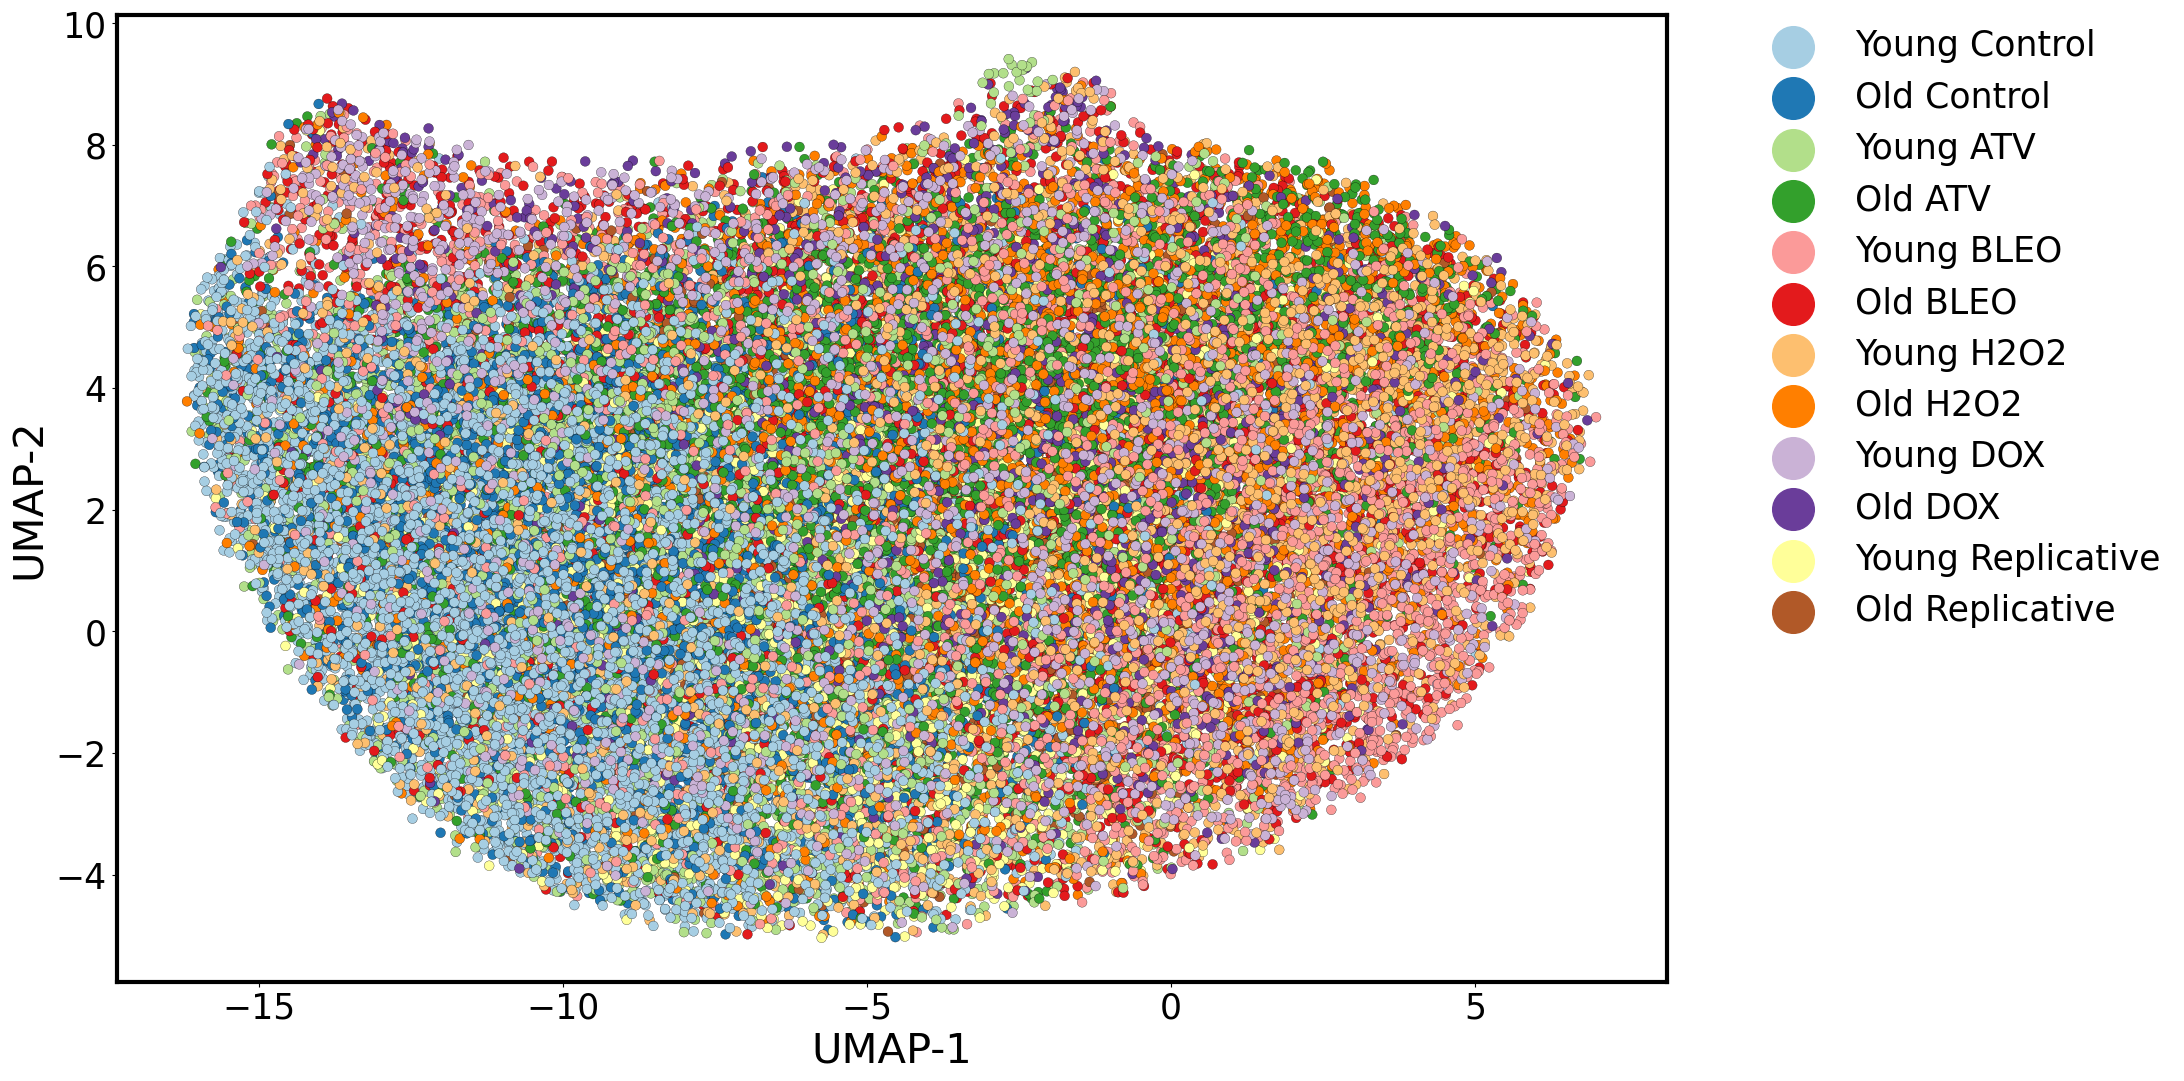

In [14]:

hue_order=['Young Control',  'Old Control',
             'Young ATV', 'Old ATV',
             'Young BLEO', 'Old BLEO',
            'Young H2O2', 'Old H2O2',
            'Young DOX', 'Old DOX',
            'Young Replicative','Old Replicative',
                        ]

fig, ax = plt.subplots(1,figsize=(20,16), linewidth=5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    
    
    
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='label',hue_order=hue_order,palette='Paired',edgecolor='black',linewidth=0.2, data=DF, ax=ax,s=30)
plt.xlabel('UMAP-1',fontsize=30);plt.ylabel('UMAP-2',fontsize=30)
plt.xticks(fontsize=20);plt.yticks(fontsize=20)

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0,fontsize=20,frameon=False,markerscale=3)


# KMEANS Analysis


In [194]:
#function to train a KMEANS model for a specified number of clusters
def train_kmeans(data,clusters):
    kmeans = KMeans(n_clusters=clusters, n_init=1,random_state=42)
    fit_kmeans=kmeans.fit(data)
    return fit_kmeans
def optimal_clusters(data): # Function to iterate through KMEANS models and attain there inertia, sillouette, and optimal values
    optimal_array=[]; inertia_array=[]; sil_array=[]
    for i in range(2,50):
        kmeans=train_kmeans(data,i) #returns model
        inertia=kmeans.inertia_ #inertia
        print(inertia)
        #now we will look at the silhouette values
        preds=kmeans.predict(data)
        sil=silhouette_score(data,preds)
        
        
        
        
        
        inertia_array.append(inertia)
        sil_array.append(sil)
        optimal_array.append(inertia/sil)
        
    return optimal_array,inertia_array,sil_array

In [195]:

# make a copy of the UMAP_Data and now perform stability analysis through the clusters
optimal_array, inertia_array,sil_Array=optimal_clusters(working_data)

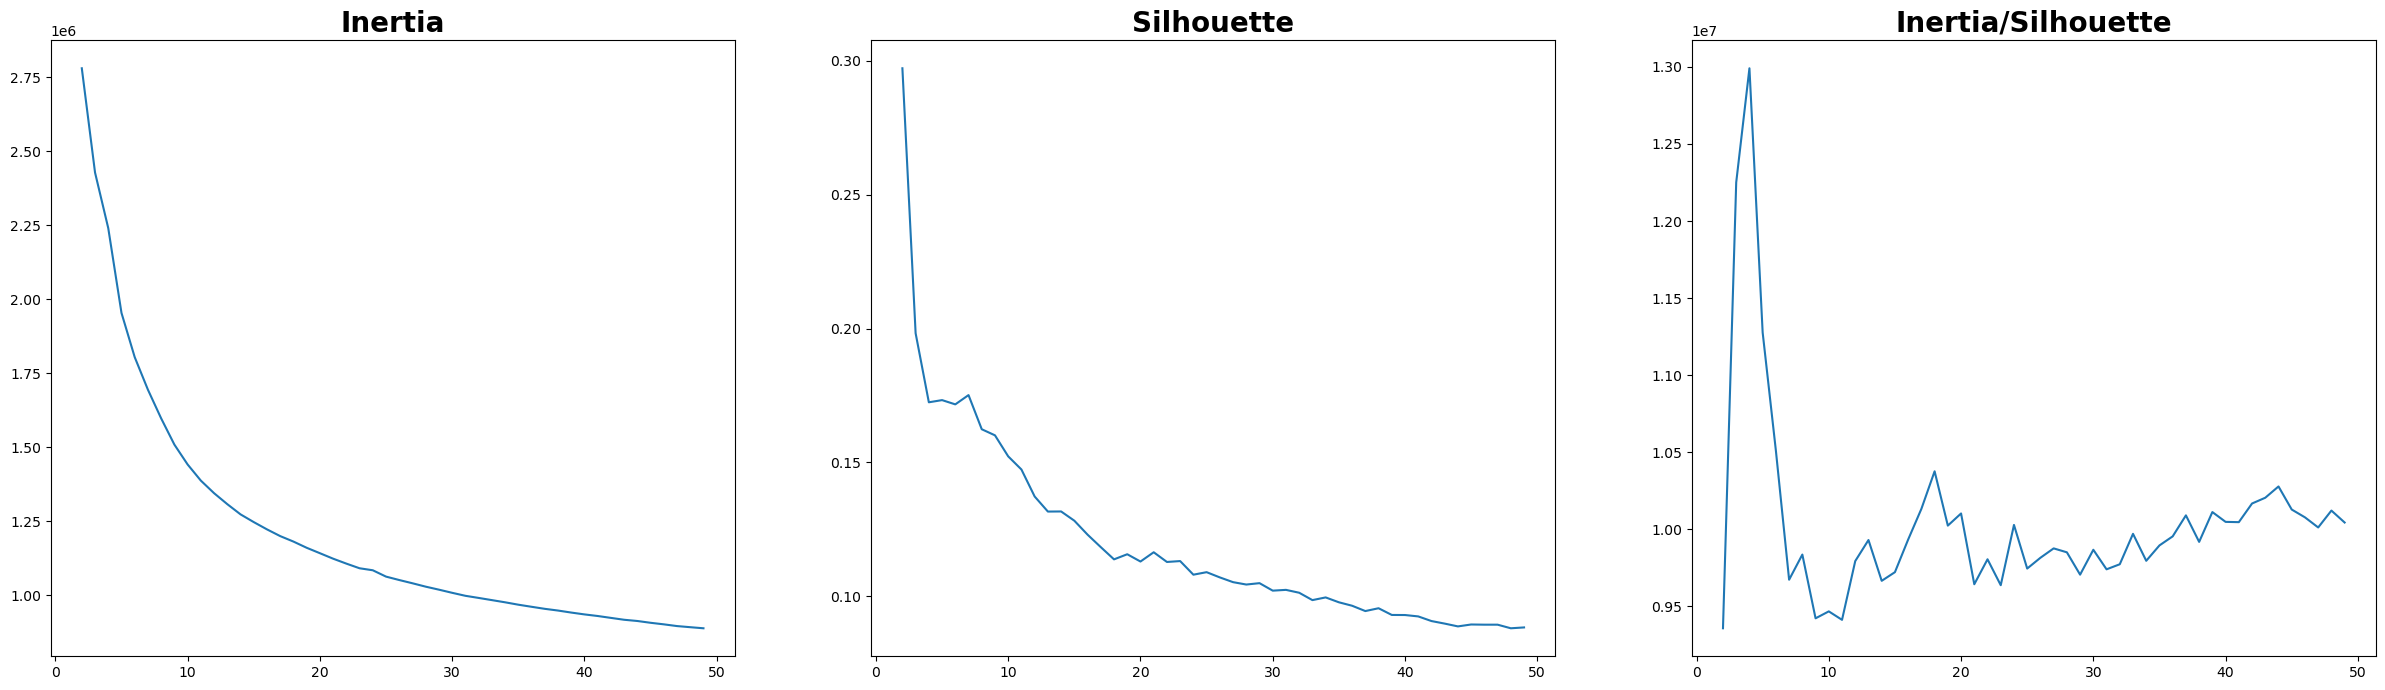

In [196]:
fig, ax = plt.subplots(1,3,figsize=(30,8))

#CTRL graph
sns.lineplot(x=np.arange(2,50), y=inertia_array,ax=ax[0])

ax[0].set_title('Inertia', fontweight='bold',fontsize=20)
ax[0].axvline(10, ls='--',color='red',linewidth=2)
ax[0].set_xlabel('KMEANS Clusters', fontsize = 20.0) # Y label


sns.lineplot(x=np.arange(2,50), y=sil_Array,ax=ax[1])

ax[1].set_title('Silhouette', fontweight='bold',fontsize=20)
ax[1].axvline(10, ls='--',color='red',linewidth=2)
ax[1].set_xlabel('KMEANS Clusters', fontsize = 20.0) # Y label



sns.lineplot(x=np.arange(2,50), y=[i / j for i, j in zip(inertia_array, sil_Array)],ax=ax[2])

ax[2].set_title('Inertia/Silhouette', fontweight='bold',fontsize=20)
ax[2].axvline(10, ls='--',color='red',linewidth=2)
ax[2].set_xlabel('KMEANS Clusters', fontsize = 20.0) # Y label

fig.savefig('\\save_path\\')

# Train Final Kmeans Model

In [21]:

kmeans = KMeans(n_clusters=10, n_init=100,random_state=42,copy_x=False,algorithm='auto')
fit_kmeans=kmeans.fit(working_data)
predict_data=kmeans.predict(working_data)
alldistances = kmeans.transform(working_data)
totalDistance = np.min(alldistances, axis=1)

# Graphing of Clusters

Note the Clusters were renumberd for ease of following for the manuscript, below is a visualization of the raw readout

In [25]:
DF['KMEANS']=predict_data;DF['Cluster_Distance']=totalDistance # add necessary columns to the datframe


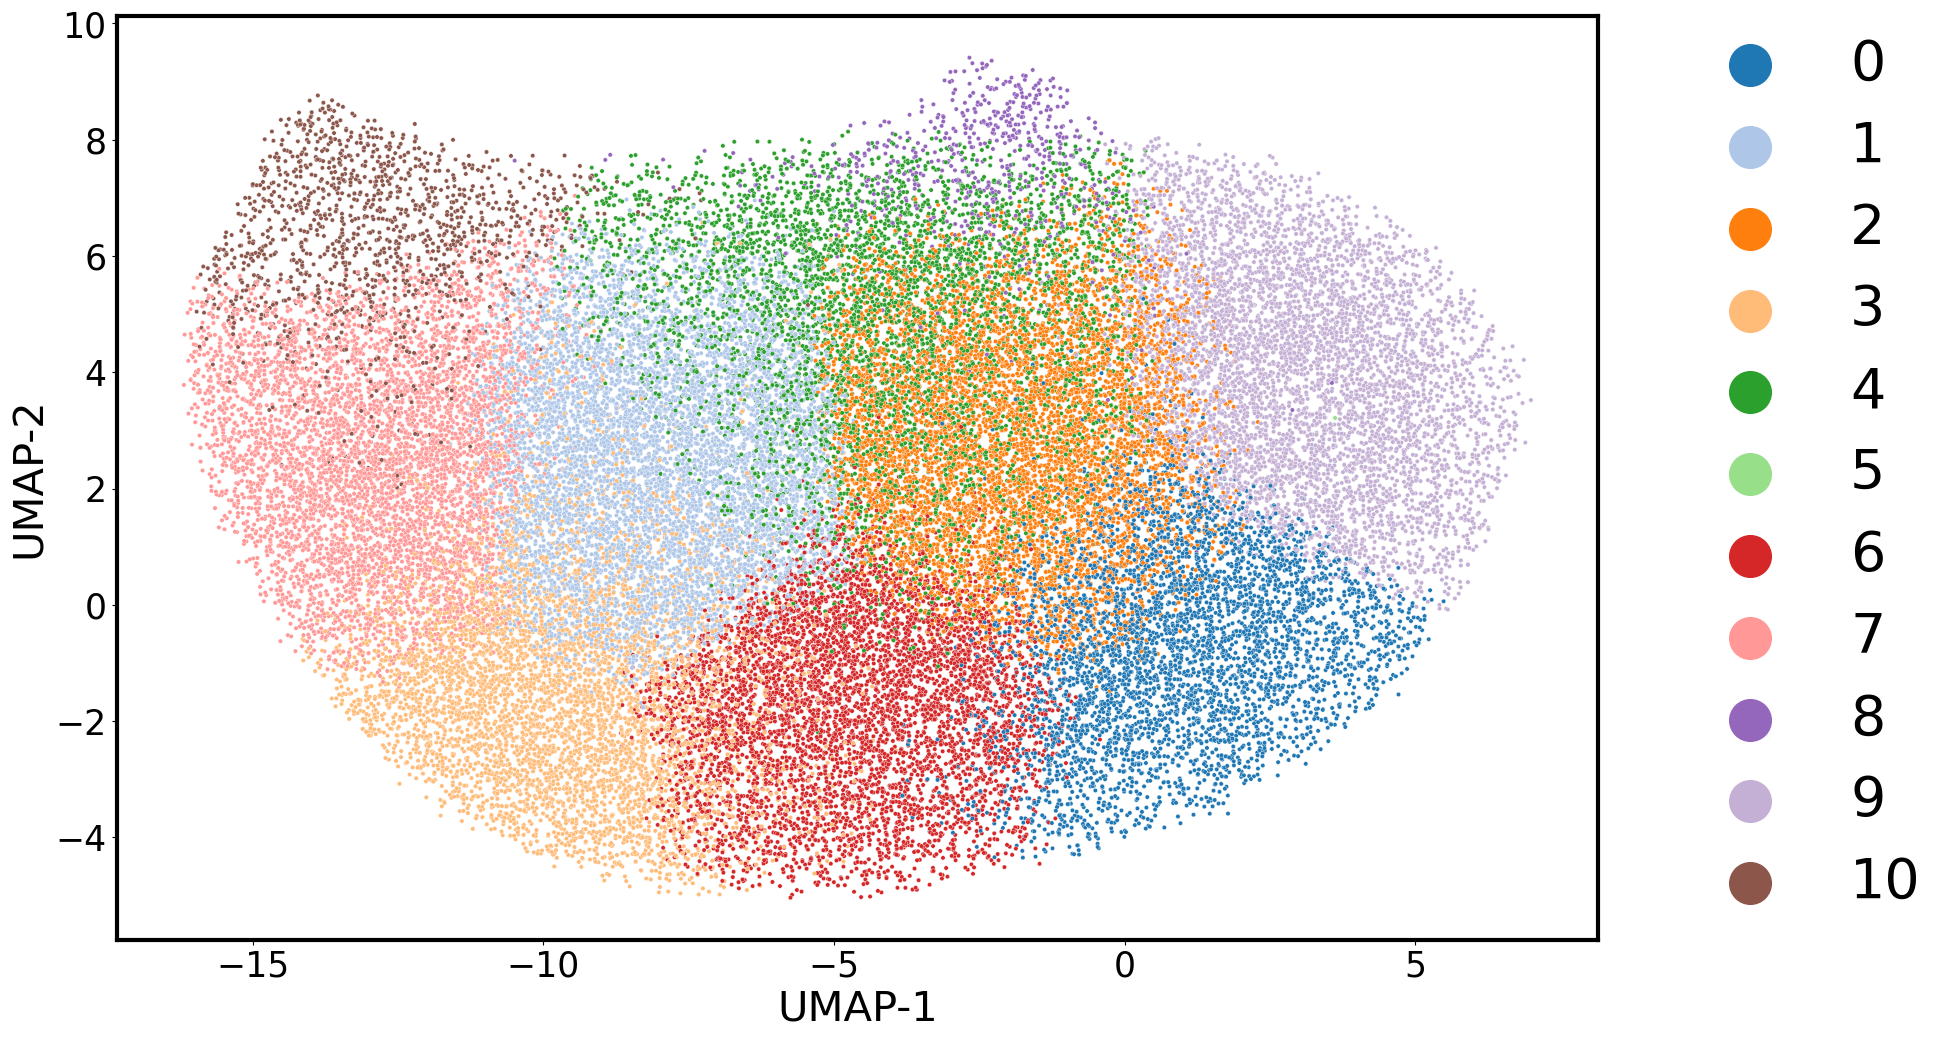

In [26]:
DF['KMEANS']=predict_data #adding kmeans to UMAP
fig, ax = plt.subplots(1,figsize=(20,12))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='KMEANS', data=DF,palette='tab20',ax=ax,s=60)

plt.xlabel('UMAP-1',fontsize=30);plt.ylabel('UMAP-2',fontsize=30)
plt.xticks(fontsize=20);plt.yticks(fontsize=20)

ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0,fontsize=30,frameon=False,markerscale=5)

Note clusters were renumbered left-to-right for ease of paper, this does not effect any of the cluster convergance

In [ ]:
DF['KMEANS_UPDATED']='' # reindexing KMEANS groups
DF.loc[DF.KMEANS == 7, 'KMEANS_UPDATED'] = 1
DF.loc[DF.KMEANS == 5, 'KMEANS_UPDATED'] = 2
DF.loc[DF.KMEANS == 10, 'KMEANS_UPDATED'] = 3
DF.loc[DF.KMEANS == 8, 'KMEANS_UPDATED'] = 4
DF.loc[DF.KMEANS == 0, 'KMEANS_UPDATED'] = 5
DF.loc[DF.KMEANS == 2, 'KMEANS_UPDATED'] = 6
DF.loc[DF.KMEANS == 6, 'KMEANS_UPDATED'] = 7
DF.loc[DF.KMEANS == 3, 'KMEANS_UPDATED'] = 8
DF.loc[DF.KMEANS == 1, 'KMEANS_UPDATED'] = 9
DF.loc[DF.KMEANS == 9, 'KMEANS_UPDATED'] = 10
DF.loc[DF.KMEANS == 4, 'KMEANS_UPDATED'] = 11


In [ ]:
#save the KMEANS Model
joblib.dump(kmeans, '\\path to KMEANS model\\')
#save the Updated Datafrmae, now with UMAP and KMEANS 
DF.to_csv('\\save_path for final model\\')